# Tutorial 2: Prediction of metabolic engineering target genes 


In [1]:
# 환경 확인
import sys
print(f"Python 경로: {sys.executable}")
print(f"Python 버전: {sys.version}")

# 필요한 라이브러리 임포트
from Simulator import Simulator
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n✓ 모든 라이브러리 임포트 성공!")
print(f"COBRApy 버전: {cobra.__version__}")


Python 경로: /Users/jaeyongryu/Projects/gem/.pixi/envs/default/bin/python
Python 버전: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:46:49) [Clang 19.1.7 ]

✓ 모든 라이브러리 임포트 성공!
COBRApy 버전: 0.30.0


## 1. MOMA Simulation - prediction of KO target genes

In [15]:
from Simulator import Simulator
import cobra
from cobra.flux_analysis import find_blocked_reactions
from cobra.io import write_sbml_model

model = cobra.io.read_sbml_model("iJR904.xml")
blocked_reactions = find_blocked_reactions(model)
print(f"Found {len(blocked_reactions)} blocked reactions")
model.remove_reactions(blocked_reactions)

write_sbml_model(model, "iJR904_rm_blocked.xml")

print(len(model.genes))
print(len(model.reactions))

sim = Simulator()
sim.load_cobra_model(model)


biomass_reaction = "BIOMASS_Ecoli"# iML1515 # "BIOMASS_Ecoli_core_w_GAM"
target_reaction = "EX_succ_e"

status, objective_value, wt_fluxes = sim.run_FBA(new_objective=biomass_reaction, internal_flux_minimization=True)

fp = open('./simulation_results_MOMA.txt', 'w')
fp.write('%s\t%s\t%s\t%s\n'%("Gene", "Reactions", "Growth", "Production rate"))
print('%s\t%s\t%s\t%s'%("Gene", "Reactions", "Growth", "Production rate"))

for each_gene in model.genes:
    if len(each_gene.reactions) > 0:
        ko_reaction_constraints = {}
        ko_reactions = []
        for each_reaction in each_gene.reactions:
            ko_reaction_constraints[each_reaction.id] = [0.0, 0.0]
            ko_reactions.append(each_reaction.id)
            
        status_moma, distance, moma_fluxes = sim.run_MOMA(
            wild_flux=wt_fluxes,
            flux_constraints=ko_reaction_constraints
        )
        
        if status_moma == "optimal":
            growth = moma_fluxes[biomass_reaction]
            target_production = moma_fluxes[target_reaction]
            ko_reaction_str = ';'.join(ko_reactions)
            fp.write('%s\t%s\t%s\t%s\n'%(each_gene, ko_reaction_str, growth, target_production))
            print('%s\t%s\t%s\t%s'%(each_gene, ko_reaction_str, growth, target_production))

fp.close()

Set parameter Username
Set parameter LicenseID to value 2736352
Academic license - for non-commercial use only - expires 2026-11-12
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmp4o4jmo30.lp
Reading time = 0.00 seconds
: 762 rows, 2151 columns, 9009 nonzeros
Set parameter Username
Set parameter LicenseID to value 2736352
Academic license - for non-commercial use only - expires 2026-11-12
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmpk4cprqhj.lp
Reading time = 0.00 seconds
: 762 rows, 2151 columns, 9009 nonzeros
Set parameter Username
Set parameter LicenseID to value 2736352
Academic license - for non-commercial use only - expires 2026-11-12
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmpnejeu5n_.lp
Reading time = 0.00 seconds
: 762 rows, 2151 columns, 9009 nonzeros
Set parameter Username
Set parameter LicenseID to value 2736352
Academic license - for non-commercial use only - ex

KeyboardInterrupt: 

## FSEOF Simulation - prediction of amplification target genes¶

/Users/jaeyongryu/Projects/gem/.pixi/envs/default/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jaeyongryu/Projects/gem/.pixi/envs/default/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


=== FSEOF Results ===
   target_flux  objective_flux  ALATA_L2  ALAabc  ALAt2r  ALCD19  ALDD2x  \
0     0.000000        0.921948       0.0     0.0     0.0     0.0     0.0   
1     0.823688        0.879199       0.0     0.0     0.0     0.0     0.0   
2     1.647377        0.836108       0.0     0.0     0.0     0.0     0.0   
3     2.471065        0.792951       0.0     0.0     0.0     0.0     0.0   
4     3.294753        0.749794       0.0     0.0     0.0     0.0     0.0   

   ABTA  ABUTD  ABUTt2r  ...     SERAT  SERD_L  SERt2r   SERt4  SGDS  SGSAD  \
0   0.0    0.0   1000.0  ...  0.214868     0.0 -1000.0  1000.0   0.0    0.0   
1   0.0    0.0   1000.0  ...  0.204905     0.0     0.0     0.0   0.0    0.0   
2   0.0    0.0   1000.0  ...  0.194863     0.0     0.0     0.0   0.0    0.0   
3   0.0    0.0   1000.0  ...  0.184804     0.0     0.0     0.0   0.0    0.0   
4   0.0    0.0   1000.0  ...  0.174746     0.0     0.0     0.0   0.0    0.0   

     SHK3Dr      SHKK     SHSL1  SOTA  
0  0.3

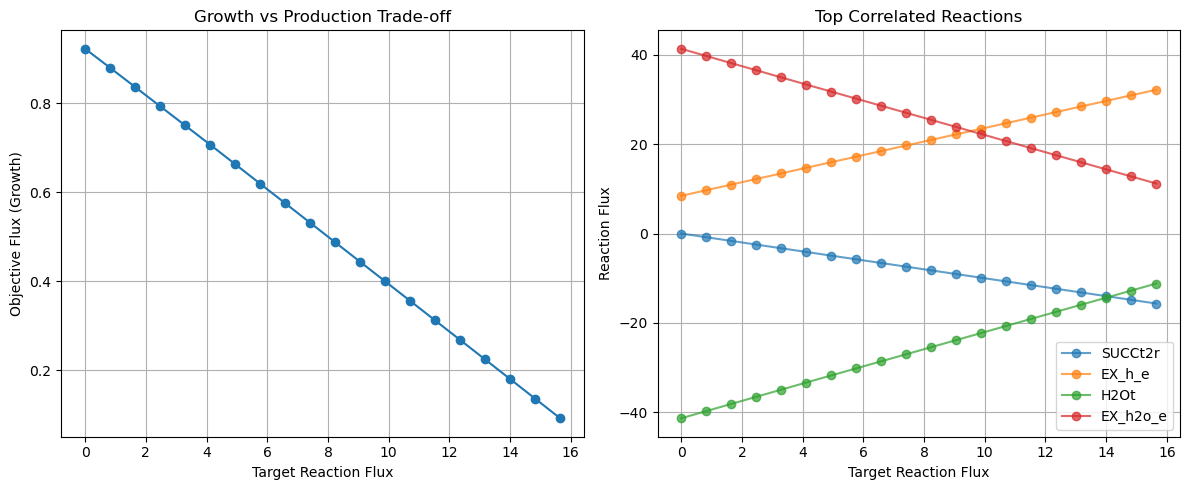

In [16]:
from Simulator import Simulator
import cobra

model = cobra.io.read_sbml_model("iJR904_rm_blocked.xml")
sim = Simulator()
sim.load_cobra_model(model)

biomass_reaction = "BIOMASS_Ecoli"# iML1515 # "BIOMASS_Ecoli_core_w_GAM"
target_reaction = "EX_succ_e"

status, results_df, correlations_df = sim.run_FSEOF(
    target_reaction=target_reaction,
    objective_fraction=0.1,
    n_points=20
)

if status == 'optimal':
    print("=== FSEOF Results ===")
    print(results_df.head())
    print(f"\nShape: {results_df.shape}")
    
    print("\n=== Top 10 Correlated Reactions ===")
    print(correlations_df.head(10))
    
    # 시각화
    import matplotlib.pyplot as plt
    
    # 1. Target flux vs Objective flux
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(results_df['target_flux'], results_df['objective_flux'], 'o-')
    plt.xlabel('Target Reaction Flux')
    plt.ylabel('Objective Flux (Growth)')
    plt.title('Growth vs Production Trade-off')
    plt.grid(True)
    
    # 2. Highly correlated reactions
    plt.subplot(1, 2, 2)
    top_rxns = correlations_df.head(5)['reaction'].tolist()
    for rxn in top_rxns:
        if rxn != target_reaction:
            plt.plot(results_df['target_flux'], results_df[rxn], 'o-', label=rxn, alpha=0.7)
    plt.xlabel('Target Reaction Flux')
    plt.ylabel('Reaction Flux')
    plt.title('Top Correlated Reactions')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 결과 저장
    results_df.to_csv('fseof_results.csv', index=False)
    correlations_df.to_csv('fseof_correlations.csv', index=False)




## 3. Flux Response Analysis

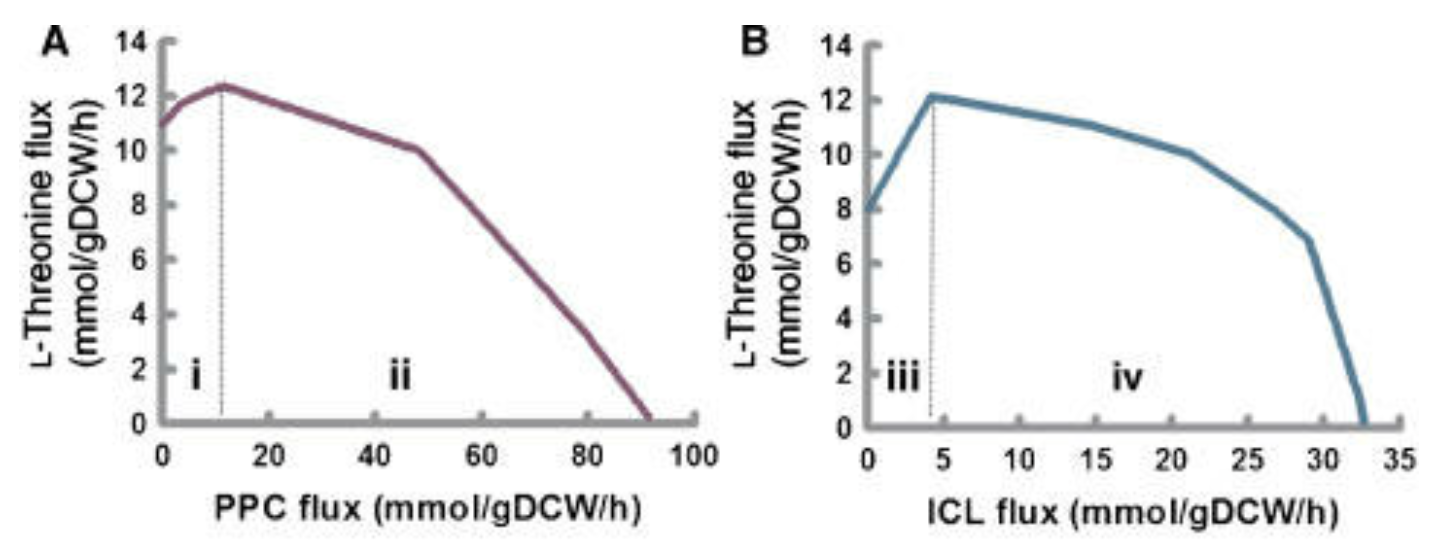

WILD-TYPE ANALYSIS
Wild-type growth rate: 0.9219
Wild-type EX_succ_e: 0.0000
Wild-type ACKr: 0.5281

STEP 1: Finding flux range of ACKr

ACKr flux range:
  Minimum: -112.4000
  Maximum: 76.5667
  Range: 188.9667

STEP 2: Scanning ACKr and maximizing EX_succ_e
-112.39999999999976 0.0 optimal
-105.88390804597678 1.7035534520321818 optimal
-99.3678160919538 3.4071069040641078 optimal
-92.85172413793082 5.110660356096479 optimal
-86.33563218390783 6.81421380812837 optimal
-79.81954022988485 8.517767260160827 optimal
-73.30344827586187 10.221320712192945 optimal
-66.78735632183889 11.595827636841818 optimal
-60.2712643678159 12.169932654817444 optimal
-53.75517241379292 12.744037672793585 optimal
Progress: 10/30 points completed
-47.23908045976994 13.318142690769166 optimal
-40.722988505746955 13.89224770874434 optimal
-34.20689655172397 14.466352726720327 optimal
-27.69080459770099 15.038750666860679 optimal
-21.174712643678006 15.588631844415145 optimal
-14.658620689655024 16.138513021969

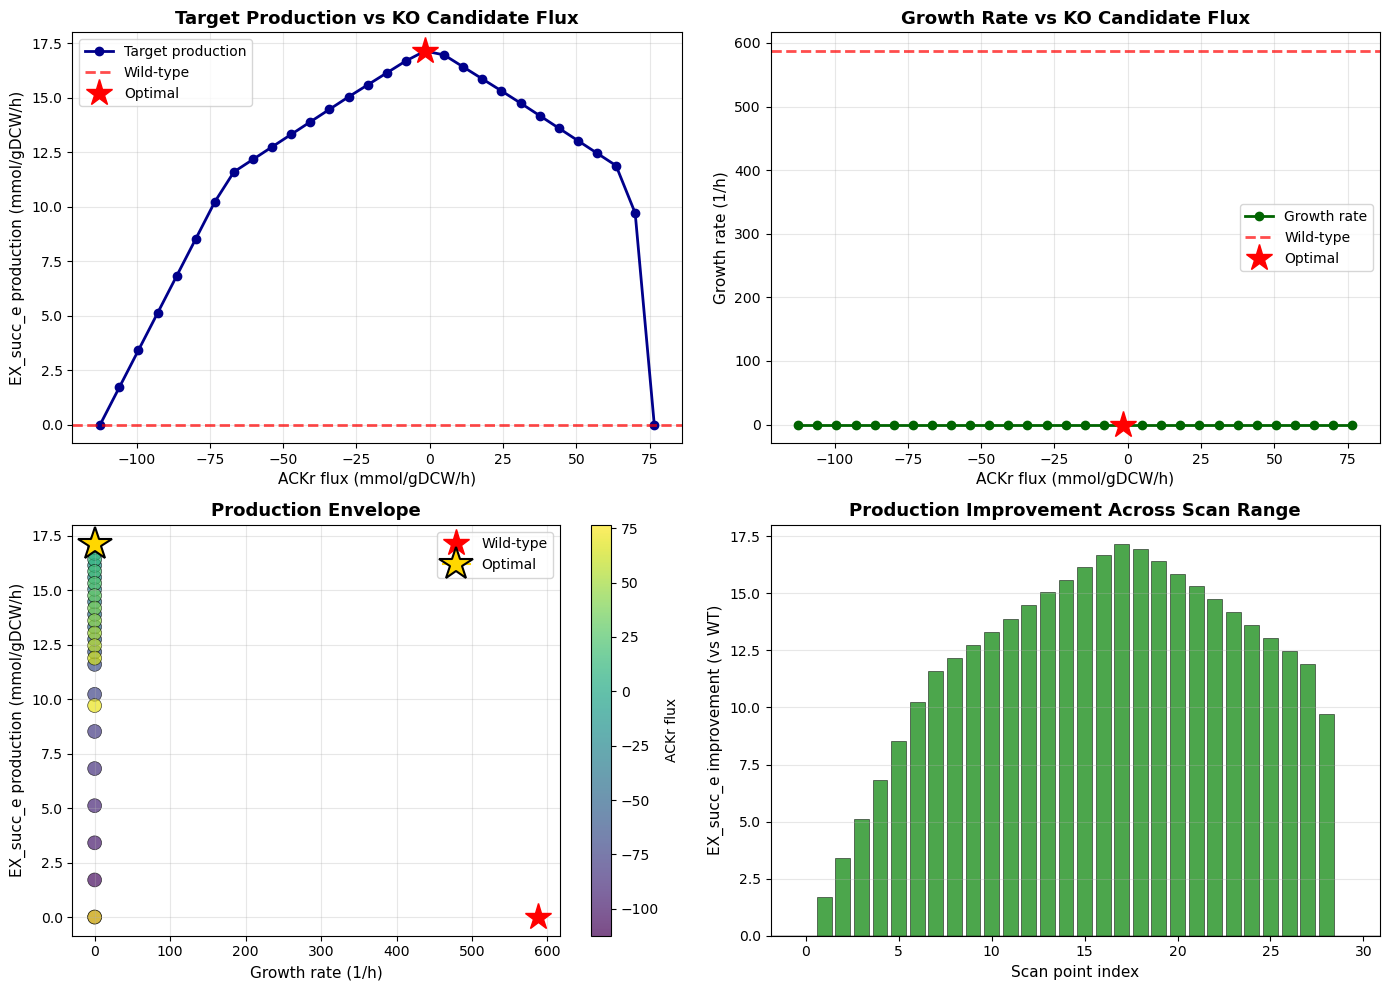

✓ Results saved to 'ko_candidate_scan_results.csv'

SUMMARY STATISTICS

Production statistics:
  Mean: 11.6240
  Std: 5.0669
  Min: 0.0000
  Max: 17.1429

Growth statistics:
  Mean: 0.0000
  Std: 0.0000
  Min: 0.0000
  Max: 0.0000

TOP 5 CONFIGURATIONS (by target production)
   ko_flux  target_production  growth_rate
 -1.626437          17.142857          0.0
  4.889655          16.962898          0.0
 -8.142529          16.688394          0.0
 11.405747          16.413017          0.0
-14.658621          16.138513          0.0

ANALYSIS COMPLETED


In [4]:
from Simulator import Simulator
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model = cobra.io.read_sbml_model("iJR904_rm_blocked.xml")
sim = Simulator()
sim.load_cobra_model(model)

biomass_reaction = "BIOMASS_Ecoli" # iML1515 # "BIOMASS_Ecoli_core_w_GAM"
target_reaction = "EX_succ_e"

ko_candidate_reaction = "ACKr"

# Wild-type FBA
status, objective_value, wt_fluxes = sim.run_FBA(
    new_objective=biomass_reaction, 
    internal_flux_minimization=True
)

print("="*80)
print("WILD-TYPE ANALYSIS")
print("="*80)
print(f"Wild-type growth rate: {wt_fluxes[biomass_reaction]:.4f}")
print(f"Wild-type {target_reaction}: {wt_fluxes[target_reaction]:.4f}")
print(f"Wild-type {ko_candidate_reaction}: {wt_fluxes[ko_candidate_reaction]:.4f}")

# ============================================================
# Step 1: Find min and max flux of KO candidate reaction
# ============================================================
print("\n" + "="*80)
print(f"STEP 1: Finding flux range of {ko_candidate_reaction}")
print("="*80)

# Minimize ko_candidate_reaction
status_min, min_flux, min_flux_dist = sim.run_FBA(
    new_objective=ko_candidate_reaction,
    mode='min'
)

# Maximize ko_candidate_reaction
status_max, max_flux, max_flux_dist = sim.run_FBA(
    new_objective=ko_candidate_reaction,
    mode='max'
)

if status_min != 'optimal' or status_max != 'optimal':
    print("ERROR: Could not find flux range for KO candidate reaction")
    exit()

print(f"\n{ko_candidate_reaction} flux range:")
print(f"  Minimum: {min_flux:.4f}")
print(f"  Maximum: {max_flux:.4f}")
print(f"  Range: {max_flux - min_flux:.4f}")

# ============================================================
# Step 2: Scan through ko_candidate flux and maximize target
# ============================================================
print("\n" + "="*80)
print(f"STEP 2: Scanning {ko_candidate_reaction} and maximizing {target_reaction}")
print("="*80)

n_points = 20
scan_points = np.linspace(min_flux, max_flux, n_points)

scan_results = []

for i, ko_flux in enumerate(scan_points):
    # Fix ko_candidate_reaction at current scan point
    flux_constraints = {
        ko_candidate_reaction: (ko_flux, ko_flux)
    }
    
    # Maximize target_reaction
    status, target_max, flux_dist = sim.run_FBA(
        new_objective=target_reaction,
        flux_constraints=flux_constraints,
        mode='max',
        internal_flux_minimization=False
    )
    print(ko_flux, target_max, status)
    
    if status == 'optimal':
        scan_results.append({
            'ko_flux': ko_flux,
            'target_production': target_max,
            'growth_rate': flux_dist[biomass_reaction],
            'status': 'optimal'
        })
        
        if (i + 1) % 10 == 0:
            print(f"Progress: {i+1}/{n_points} points completed")
    else:
        scan_results.append({
            'ko_flux': ko_flux,
            'target_production': 0.0,
            'growth_rate': 0.0,
            'status': 'infeasible'
        })

# Convert to DataFrame
df_scan = pd.DataFrame(scan_results)
df_optimal = df_scan[df_scan['status'] == 'optimal']

print(f"\nScanning completed: {len(df_optimal)}/{len(df_scan)} points feasible")

# ============================================================
# Step 3: Find optimal ko_flux for maximum production
# ============================================================
print("\n" + "="*80)
print("STEP 3: Finding optimal flux configuration")
print("="*80)

if len(df_optimal) > 0:
    optimal_idx = df_optimal['target_production'].idxmax()
    optimal_ko_flux = df_optimal.loc[optimal_idx, 'ko_flux']
    optimal_production = df_optimal.loc[optimal_idx, 'target_production']
    optimal_growth = df_optimal.loc[optimal_idx, 'growth_rate']
    
    print(f"\nOptimal configuration:")
    print(f"  {ko_candidate_reaction} flux: {optimal_ko_flux:.4f}")
    print(f"  {target_reaction} production: {optimal_production:.4f}")
    print(f"  Growth rate: {optimal_growth:.4f}")
    
    print(f"\nComparison with wild-type:")
    print(f"  Production increase: {optimal_production - wt_fluxes[target_reaction]:.4f}")
    print(f"  Production fold-change: {optimal_production / wt_fluxes[target_reaction]:.2f}x" 
          if wt_fluxes[target_reaction] != 0 else "  Production fold-change: N/A")
    print(f"  Growth change: {optimal_growth - objective_value:.4f}")
    print(f"  Growth ratio: {optimal_growth / objective_value:.2f}x")

# ============================================================
# Step 4: Visualization
# ============================================================
print("\n" + "="*80)
print("STEP 4: Creating visualizations")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: KO flux vs Target production
ax1 = axes[0, 0]
ax1.plot(df_optimal['ko_flux'], df_optimal['target_production'], 
         'o-', linewidth=2, markersize=6, color='darkblue', label='Target production')
ax1.axhline(wt_fluxes[target_reaction], color='red', linestyle='--', 
            linewidth=2, label='Wild-type', alpha=0.7)
if len(df_optimal) > 0:
    ax1.plot(optimal_ko_flux, optimal_production, 'r*', 
             markersize=20, label='Optimal', zorder=5)
ax1.set_xlabel(f'{ko_candidate_reaction} flux (mmol/gDCW/h)', fontsize=11)
ax1.set_ylabel(f'{target_reaction} production (mmol/gDCW/h)', fontsize=11)
ax1.set_title('Target Production vs KO Candidate Flux', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: KO flux vs Growth rate
ax2 = axes[0, 1]
ax2.plot(df_optimal['ko_flux'], df_optimal['growth_rate'], 
         'o-', linewidth=2, markersize=6, color='darkgreen', label='Growth rate')
ax2.axhline(objective_value, color='red', linestyle='--', 
            linewidth=2, label='Wild-type', alpha=0.7)
if len(df_optimal) > 0:
    ax2.plot(optimal_ko_flux, optimal_growth, 'r*', 
             markersize=20, label='Optimal', zorder=5)
ax2.set_xlabel(f'{ko_candidate_reaction} flux (mmol/gDCW/h)', fontsize=11)
ax2.set_ylabel('Growth rate (1/h)', fontsize=11)
ax2.set_title('Growth Rate vs KO Candidate Flux', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Growth vs Production trade-off
ax3 = axes[1, 0]
scatter = ax3.scatter(df_optimal['growth_rate'], df_optimal['target_production'],
                      c=df_optimal['ko_flux'], cmap='viridis', 
                      s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
ax3.plot(objective_value, wt_fluxes[target_reaction], 'r*', 
         markersize=20, label='Wild-type', zorder=5)
if len(df_optimal) > 0:
    ax3.plot(optimal_growth, optimal_production, 'gold', marker='*',
             markersize=25, label='Optimal', zorder=6, 
             markeredgecolor='black', markeredgewidth=1.5)
ax3.set_xlabel('Growth rate (1/h)', fontsize=11)
ax3.set_ylabel(f'{target_reaction} production (mmol/gDCW/h)', fontsize=11)
ax3.set_title('Production Envelope', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label(f'{ko_candidate_reaction} flux', fontsize=10)

# Plot 4: Production improvement distribution
ax4 = axes[1, 1]
production_improvement = df_optimal['target_production'] - wt_fluxes[target_reaction]
colors = ['green' if x > 0 else 'red' for x in production_improvement]
ax4.bar(range(len(production_improvement)), production_improvement, 
        color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
ax4.axhline(0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Scan point index', fontsize=11)
ax4.set_ylabel(f'{target_reaction} improvement (vs WT)', fontsize=11)
ax4.set_title('Production Improvement Across Scan Range', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('ko_candidate_scan_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved to 'ko_candidate_scan_analysis.png'")
plt.show()

# ============================================================
# Step 5: Save results
# ============================================================
df_scan.to_csv('ko_candidate_scan_results.csv', index=False)
print("✓ Results saved to 'ko_candidate_scan_results.csv'")

# ============================================================
# Step 6: Summary statistics
# ============================================================
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

if len(df_optimal) > 0:
    print(f"\nProduction statistics:")
    print(f"  Mean: {df_optimal['target_production'].mean():.4f}")
    print(f"  Std: {df_optimal['target_production'].std():.4f}")
    print(f"  Min: {df_optimal['target_production'].min():.4f}")
    print(f"  Max: {df_optimal['target_production'].max():.4f}")
    
    print(f"\nGrowth statistics:")
    print(f"  Mean: {df_optimal['growth_rate'].mean():.4f}")
    print(f"  Std: {df_optimal['growth_rate'].std():.4f}")
    print(f"  Min: {df_optimal['growth_rate'].min():.4f}")
    print(f"  Max: {df_optimal['growth_rate'].max():.4f}")
    
    # Top 5 configurations
    print("\n" + "="*80)
    print("TOP 5 CONFIGURATIONS (by target production)")
    print("="*80)
    top_5 = df_optimal.nlargest(5, 'target_production')
    print(top_5[['ko_flux', 'target_production', 'growth_rate']].to_string(index=False))

print("\n" + "="*80)
print("ANALYSIS COMPLETED")
print("="*80)

## 4. Random sampling

Flux Sampling Analysis: Before and After Knockout

[1] Sampling Wild-type model...
Total reactions: 667
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmp5ugpxqpv.lp
Reading time = 0.00 seconds
: 761 rows, 1334 columns, 5894 nonzeros
Wild-type samples shape: (100, 667)
Sampling completed: 100 samples

[2] Creating knockout model (KO: ACKr)...
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmp2frit3r7.lp
Reading time = 0.00 seconds
: 761 rows, 1334 columns, 5894 nonzeros
Knocked out reaction: ACKr
Bounds after KO: (0, 0)

Sampling Knockout model...
Read LP format model from file /var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/tmpbpv0rm3a.lp
Reading time = 0.00 seconds
: 761 rows, 1334 columns, 5894 nonzeros
Knockout samples shape: (100, 667)
Sampling completed: 100 samples

[3] Extracting flux data...

STATISTICAL SUMMARY

[Wild-type]
Growth rate - Mean: 0.0878, Std: 0.0409
Growth rate - Min: 0.0075, Max: 0.2031
Target f

/var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/ipykernel_22778/3702110520.py:143: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 2].boxplot(box_data, labels=['WT', 'KO'], patch_artist=True)
/var/folders/4r/d3qxwdd10457lrhz5t27f1br0000gn/T/ipykernel_22778/3702110520.py:152: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1, 0].boxplot(box_data_target, labels=['WT', 'KO'], patch_artist=True)


Figure saved: flux_sampling_comparison.png


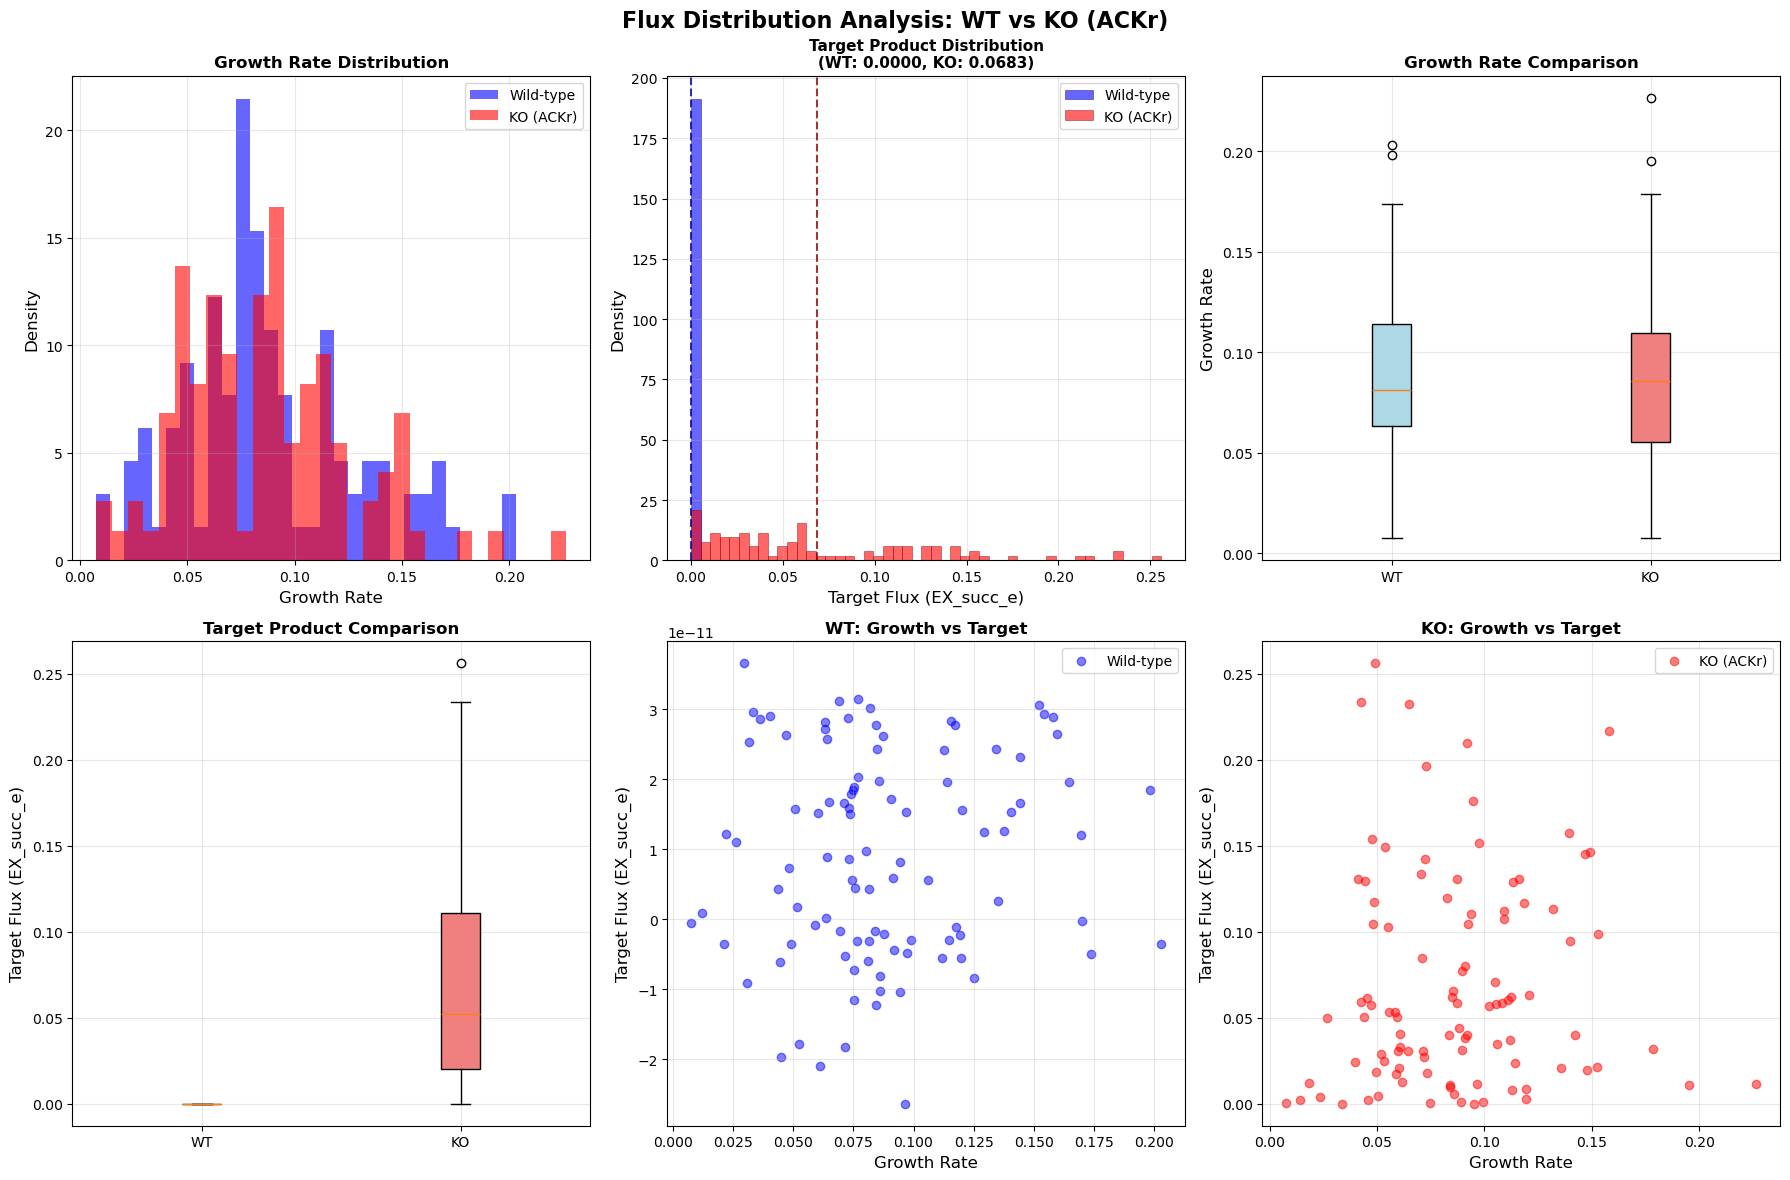

Figure saved: flux_sampling_violin.png


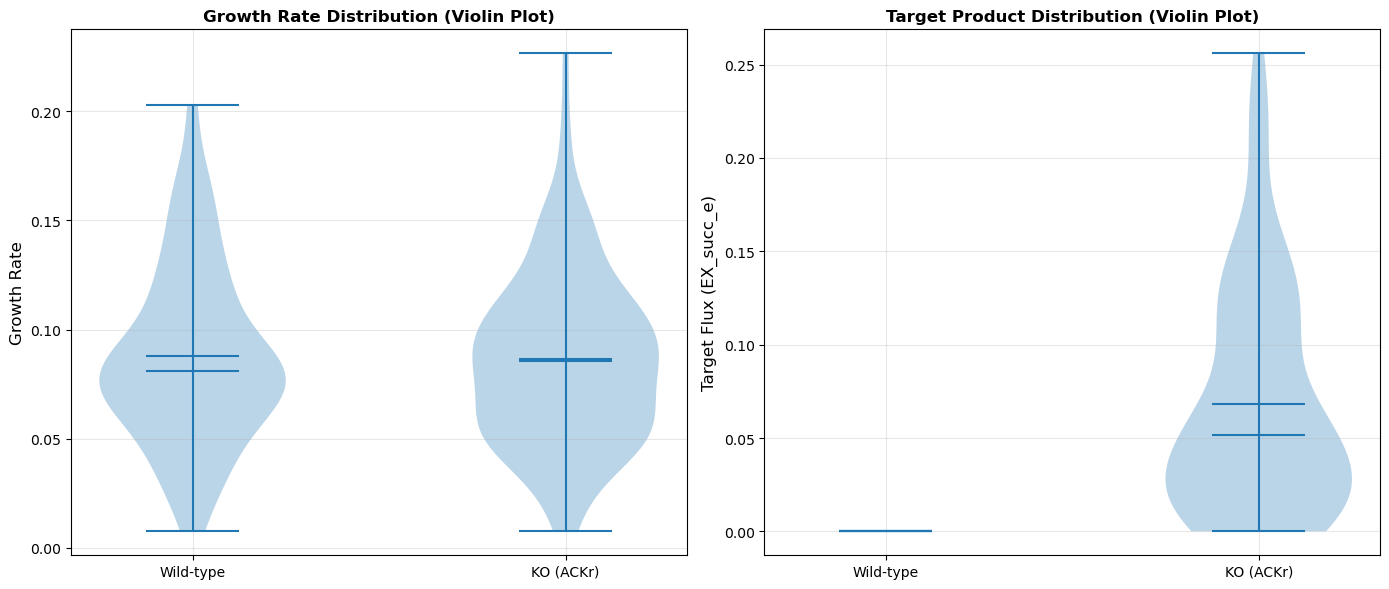


[5] Saving results...
Results saved: flux_sampling_results.csv
Statistics saved: flux_sampling_statistics.csv

Analysis completed successfully!


In [7]:
import cobra
from cobra.sampling import OptGPSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 모델 로드
model = cobra.io.read_sbml_model("iJR904_rm_blocked.xml")

# 파라미터 설정
biomass_reaction = "BIOMASS_Ecoli" # iML1515 # "BIOMASS_Ecoli_core_w_GAM"
target_reaction_id = "EX_succ_e"  # 목표 생성물 반응
ko_reaction_id = "ACKr"  # knockout할 반응
n_samples = 100  # 샘플 개수

print("=" * 60)
print("Flux Sampling Analysis: Before and After Knockout")
print("=" * 60)

# ===== 1. Wild-type 샘플링 =====
print("\n[1] Sampling Wild-type model...")
print(f"Total reactions: {len(model.reactions)}")

# OptGP sampler 생성 (wild-type)
wt_sampler = OptGPSampler(model, processes=4, thinning=100)

# 샘플링
wt_samples = wt_sampler.sample(n_samples)

print(f"Wild-type samples shape: {wt_samples.shape}")
print(f"Sampling completed: {len(wt_samples)} samples")

# ===== 2. Knockout 모델 생성 및 샘플링 =====
print(f"\n[2] Creating knockout model (KO: {ko_reaction_id})...")

# 모델 복사
ko_model = model.copy()

# 반응 knockout (flux를 0으로 고정)
ko_reaction = ko_model.reactions.get_by_id(ko_reaction_id)
ko_reaction.knock_out()

print(f"Knocked out reaction: {ko_reaction.id}")
print(f"Bounds after KO: {ko_reaction.bounds}")

# OptGP sampler 생성 (knockout)
print("\nSampling Knockout model...")
ko_sampler = OptGPSampler(ko_model, processes=4, thinning=100)

# 샘플링
ko_samples = ko_sampler.sample(n_samples)

print(f"Knockout samples shape: {ko_samples.shape}")
print(f"Sampling completed: {len(ko_samples)} samples")

# ===== 3. 데이터 추출 및 정리 =====
print("\n[3] Extracting flux data...")

# Growth rate 추출
biomass_rxn_id = model.objective.expression.as_coefficients_dict()
biomass_rxn_id = list(biomass_rxn_id.keys())[0].name

wt_growth = wt_samples[biomass_rxn_id]
ko_growth = ko_samples[biomass_rxn_id]

# Target product flux 추출
wt_target = wt_samples[target_reaction_id]
ko_target = ko_samples[target_reaction_id]

# 데이터프레임 생성
wt_df = pd.DataFrame({
    'Growth': wt_growth,
    'Target': wt_target,
    'Condition': 'Wild-type'
})

ko_df = pd.DataFrame({
    'Growth': ko_growth,
    'Target': ko_target,
    'Condition': f'KO ({ko_reaction_id})'
})

combined_df = pd.concat([wt_df, ko_df], ignore_index=True)

# ===== 4. 통계 요약 =====
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)

print("\n[Wild-type]")
print(f"Growth rate - Mean: {wt_growth.mean():.4f}, Std: {wt_growth.std():.4f}")
print(f"Growth rate - Min: {wt_growth.min():.4f}, Max: {wt_growth.max():.4f}")
print(f"Target flux - Mean: {wt_target.mean():.4f}, Std: {wt_target.std():.4f}")
print(f"Target flux - Min: {wt_target.min():.4f}, Max: {wt_target.max():.4f}")

print(f"\n[Knockout - {ko_reaction_id}]")
print(f"Growth rate - Mean: {ko_growth.mean():.4f}, Std: {ko_growth.std():.4f}")
print(f"Growth rate - Min: {ko_growth.min():.4f}, Max: {ko_growth.max():.4f}")
print(f"Target flux - Mean: {ko_target.mean():.4f}, Std: {ko_target.std():.4f}")
print(f"Target flux - Min: {ko_target.min():.4f}, Max: {ko_target.max():.4f}")

print("\n[Change after KO]")
print(f"Growth rate change: {((ko_growth.mean() - wt_growth.mean()) / wt_growth.mean() * 100):.2f}%")
print(f"Target flux change: {((ko_target.mean() - wt_target.mean()) / wt_target.mean() * 100):.2f}%")

# ===== 5. 시각화 =====
print("\n[4] Creating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'Flux Distribution Analysis: WT vs KO ({ko_reaction_id})', 
             fontsize=16, fontweight='bold')

# 5-1. Growth rate 히스토그램
axes[0, 0].hist(wt_growth, bins=30, alpha=0.6, label='Wild-type', color='blue', density=True)
axes[0, 0].hist(ko_growth, bins=30, alpha=0.6, label=f'KO ({ko_reaction_id})', color='red', density=True)
axes[0, 0].set_xlabel('Growth Rate', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('Growth Rate Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 5-2. Target product 히스토그램 (overlay 개선 버전)
# 데이터 범위 확인 후 적절한 bins 설정
all_target_data = pd.concat([wt_target, ko_target])
bin_range = (all_target_data.min(), all_target_data.max())
bins = np.linspace(bin_range[0], bin_range[1], 50)

axes[0, 1].hist(wt_target, bins=bins, alpha=0.6, label='Wild-type', color='blue', density=True, edgecolor='darkblue', linewidth=0.5)
axes[0, 1].hist(ko_target, bins=bins, alpha=0.6, label=f'KO ({ko_reaction_id})', color='red', density=True, edgecolor='darkred', linewidth=0.5)
axes[0, 1].axvline(wt_target.mean(), color='darkblue', linestyle='--', linewidth=1.5, alpha=0.8)
axes[0, 1].axvline(ko_target.mean(), color='darkred', linestyle='--', linewidth=1.5, alpha=0.8)
axes[0, 1].set_xlabel(f'Target Flux ({target_reaction_id})', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].set_title(f'Target Product Distribution\n(WT: {wt_target.mean():.4f}, KO: {ko_target.mean():.4f})', 
                     fontsize=11, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 5-3. Box plot 비교
box_data = [wt_growth, ko_growth]
bp = axes[0, 2].boxplot(box_data, labels=['WT', 'KO'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[0, 2].set_ylabel('Growth Rate', fontsize=12)
axes[0, 2].set_title('Growth Rate Comparison', fontsize=12, fontweight='bold')
axes[0, 2].grid(alpha=0.3)

# 5-4. Target product box plot
box_data_target = [wt_target, ko_target]
bp2 = axes[1, 0].boxplot(box_data_target, labels=['WT', 'KO'], patch_artist=True)
bp2['boxes'][0].set_facecolor('lightblue')
bp2['boxes'][1].set_facecolor('lightcoral')
axes[1, 0].set_ylabel(f'Target Flux ({target_reaction_id})', fontsize=12)
axes[1, 0].set_title('Target Product Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 5-5. Scatter plot: Growth vs Target (WT)
axes[1, 1].scatter(wt_growth, wt_target, alpha=0.5, color='blue', label='Wild-type')
axes[1, 1].set_xlabel('Growth Rate', fontsize=12)
axes[1, 1].set_ylabel(f'Target Flux ({target_reaction_id})', fontsize=12)
axes[1, 1].set_title('WT: Growth vs Target', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 5-6. Scatter plot: Growth vs Target (KO)
axes[1, 2].scatter(ko_growth, ko_target, alpha=0.5, color='red', label=f'KO ({ko_reaction_id})')
axes[1, 2].set_xlabel('Growth Rate', fontsize=12)
axes[1, 2].set_ylabel(f'Target Flux ({target_reaction_id})', fontsize=12)
axes[1, 2].set_title(f'KO: Growth vs Target', fontsize=12, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('flux_sampling_comparison.png', dpi=300, bbox_inches='tight')
print("Figure saved: flux_sampling_comparison.png")
plt.show()

# ===== 6. 추가 분석: Violin plot =====
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot for Growth
parts = axes2[0].violinplot([wt_growth, ko_growth], positions=[1, 2], 
                             showmeans=True, showmedians=True)
axes2[0].set_xticks([1, 2])
axes2[0].set_xticklabels(['Wild-type', f'KO ({ko_reaction_id})'])
axes2[0].set_ylabel('Growth Rate', fontsize=12)
axes2[0].set_title('Growth Rate Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes2[0].grid(alpha=0.3)

# Violin plot for Target
parts2 = axes2[1].violinplot([wt_target, ko_target], positions=[1, 2], 
                              showmeans=True, showmedians=True)
axes2[1].set_xticks([1, 2])
axes2[1].set_xticklabels(['Wild-type', f'KO ({ko_reaction_id})'])
axes2[1].set_ylabel(f'Target Flux ({target_reaction_id})', fontsize=12)
axes2[1].set_title('Target Product Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes2[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('flux_sampling_violin.png', dpi=300, bbox_inches='tight')
print("Figure saved: flux_sampling_violin.png")
plt.show()

# ===== 7. 결과 저장 =====
print("\n[5] Saving results...")

# CSV 저장
combined_df.to_csv('flux_sampling_results.csv', index=False)
print("Results saved: flux_sampling_results.csv")

# 통계 요약 저장
summary_stats = pd.DataFrame({
    'Metric': ['Growth_mean', 'Growth_std', 'Growth_min', 'Growth_max',
               'Target_mean', 'Target_std', 'Target_min', 'Target_max'],
    'Wild-type': [wt_growth.mean(), wt_growth.std(), wt_growth.min(), wt_growth.max(),
                  wt_target.mean(), wt_target.std(), wt_target.min(), wt_target.max()],
    f'KO_{ko_reaction_id}': [ko_growth.mean(), ko_growth.std(), ko_growth.min(), ko_growth.max(),
                              ko_target.mean(), ko_target.std(), ko_target.min(), ko_target.max()]
})

summary_stats.to_csv('flux_sampling_statistics.csv', index=False)
print("Statistics saved: flux_sampling_statistics.csv")

print("\n" + "=" * 60)
print("Analysis completed successfully!")
print("=" * 60)